# Mini-Project 3
## Folded-Cascode Differential Amplifier
### Ian Eykamp
#### October 9, 2023

---

## 1. Circuit Analysis
![Folded-cascode differential amplifier from MP3 handout.](images/diff_amp_circuit.png)

**(a)** The circuit makes use of the diff pair $V_1$, $V_2$ to draw a variable amount of current out of the drains of $M_3$ and $M_4$. When $I_1 \neq I_2$, then the currents in the lower branches $M_5$ through $M_{10}$ become unequal. Because the pull-down transistors $M_7$ through $M_{10}$ are in a current mirror configuration driven by the left hand side, the currents can only be solved for if $V_{out}$ slams to less than $2 V_{DS,sat}$ away from the rails to put $M_6$ and $M_4$ or $M_{10}$ and $M_8$ into the ohmic region.

$V_1$ is the non-inverting input, because when $I_1 > I_2$, then the pull-down transistors on the left draw less current, which is mirrored to the pull-down transitors on the right, and so $M_6$ is passing more current than $M_{10}$ and $M_8$ are able to, and $V_{out}$ rises to put $M_6$ and $M_4$ into the ohmic region.

$V_2$ is the inverting input, because when $I_1 < I_2$, then the pull-down transistors on the left draw more current, which is mirrored to the pull-down transitors on the right, and $M_6$ cannot pass as much current as $M_{10}$ and $M_8$ are trying to, and so $V_{out}$ falls to put $M_{10}$ and ${M_8}$ into the ohmic region.

**(b)** $M_1$ or $M_2$ must be capable of passing at least $I_b$. For this, one of their gate voltages $V_1$ and $V_2$ must be at least $V_{bn}$ higher than the conmmon-source voltage $V_{node}$, such that $V_{GS}$ for $M_1$ or $M_2$ is around $V_{GS}$ for $M_b$. For the circuit to work correctly, $M_b$ must be in saturation, so $V_{node} \ge V_{DS,sat}$. Therefore, we have that $V_{CM} \ge V_{bn} + V_{DS,sat}$.

$M_3$ and $M_4$ should also be capable of passing $I_b$, which means they should remain in saturation. This provides an upper bound in the form of $V_{node} \le V_{DD} - V_{DS,sat}$. We already established that $V_1$ or $V_2$ is $V_{bn}$ higher than $V_{node}$, so $V_{CM} - V_{bn} \le V_{DD} - V_{DS,sat}$, or $V_{CM} \le V_{DD} - V_{DS,sat} + V_{bn}$. Since $V_{bn} > V_{DS,sat}$, the upper limit of $V_{CM}$ is only given by $V_{DD}$. Therefore, we have $V_{bn} + V_{DS,sat} \le V_{CM} \le V_{DD}$.

**(c)** Let the current through $M_3$ and $M_4$ be $I_b$ based on the bias voltage $V_{bp}$, where $I_b \ge I_1, I_2$. The current through $M_7$, $M_9$ is $I_b - I_1$, and it is mirrored over to $M_8$, $M_{10}$ if all transistors are in saturation. The current through $M_6$ is $I_b - I_2$. By Kirchoff's Current Law, the current into the output node is $I_b - I_2 - (I_b - I_1) = I_1 - I_2$.

**(d)** The current through $M_3$ and $M_4$ must be at least $I_b$, because when $V_1 \neq V_2$, then either $I_1 = I_b$ or $I_2 = I_b$. If $M_3$ or $M_4$ could not source this current, then $M_1$ or $M_2$ would have to fall out of saturation, and the behavior of the ciruit would be compromised. You might be able to make an argument that in this case, one of the currents is still larger than the other, and the imbalance in current still forces the ouput voltage to swing in the same way albeit with a slower slew rate. The circuit would still operate more or less like a diff amp at DC when the current through $M_3$ and $M_4$ is greater than $\frac{1}{2} I_b$, but really, it is best to keep it above or equal to $I_b$. Having a larger current would not hinder the circuit's operation, but it would be superfluous, as the maximum current into the output node's parasitic capacitance is still $I_1 - I_2$.

**(e)** I used the cascode bias voltage generator that we went over in class and described in Brad's [paper on the subject](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=1010300), shown in Figure 3.

## 2. Xschem Simulations

The folded-cascode differential amplifier is shown in Figure 2, and the bias voltage generator is shown in Figure 3.

![Xschem schematic for folded-cascode differential amplifier.](images/opamp_schematic.png)

![Xschem schematic for bias voltage generator circuit.](images/bias_schematic.png)

**(a)** Figure 4 shows the test harness used to analyze the voltage transfer characteristics with $V_2$ set at various constant voltages over the entire common-mode input range in increments of $0.2V$. At $V_2 = 800mV$ and above, the output has a gain of over 800 and approaches the rails asymptotically (but more quickly on the pull-down side, probably due to better mobility of electrons than holes). For $V_2 = 600mV$ and below, the output does not reach the lower rails. This makes sense, because the common-mode input voltage is below the acceptable range of $V_{CM} \ge V_{bn} + V_{DS,sat}$, where $V_{bn} \approx 670mV$ and $V_{DS,sat} \approx 100mV$.

![Test harness for diff amp VTCs.](images/opamp_vtc.png)

**(b)** Figure 5 shows the test harness used to analyze the IV characteristic with $V_2 = 0.8V$ and the output node held at 0.8V. When $V_1 = V_2$, the output current is zero. The incremental transconductance gain $\frac{\delta I_{sat}}{\delta V_G}$ is around $176 \mu A / V$. Given that the intrinsic gain is given by the product of the incremental transconductance gain and the early effect resistance $g_m \cdot r_o$, this implies that $r_o \approx 4.66 M \Omega$, which is a reasonable value. The current approaches $+20 \mu A / -17 \mu A$, which is nearly $\pm I_b$, where $I_b \approx 22.62 \mu A$.

![Test harness for IV characteristic.](images/opamp_vtc.png)

**(c)** Figure 6 shows the test harness used to analyzed the loopgain of the diff amp. The loopgain magnitude falls off at a very consistent $20dB / \text{decade}$ with a cutoff frequency of around 5kHz; the phase has two poles centered around the unity-gain bandwidth of $1MHz$.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from si_prefix import si_format
from plot_labler import axes_labels, make_grids, sigfig_format

In [44]:
df_vtc = pd.read_csv("opamp_vtc_2.txt", delimiter = "\s+")
df_iout = pd.read_csv("opamp_iout_3.txt", delimiter = "\s+")
df_ac = pd.read_csv("opamp_ac_closed_loop.txt", delimiter = "\s+")
df_loopgain = pd.read_csv("opamp_loopgain.txt", delimiter = "\s+")

df_vtc.rename({"v(V1)": "V1", "v(V2)": "V2", "v(Vout)": "Vout"}, axis = "columns", inplace = True)
df_vtc.drop("v-sweep", axis = "columns", inplace = True)

df_iout.rename({"v(V1)": "V1", "v(V2)": "V2", "v(Vout)": "Vout", "i(Vout)": "Iout", "i(V1)": "I1", "i(V2)": "I2"}, axis = "columns", inplace = True)
df_iout.drop("v-sweep", axis = "columns", inplace = True)

df_ac.rename({"frequency": "freq", "db(v(Vout))": "mag", "cph(v(Vout))*360/2/pi": "phase"}, axis = "columns", inplace = True)
df_ac["freq"] = df_ac["freq"] / 2 / np.pi

df_loopgain.rename({"frequency": "freq", "Tmag": "mag", "Tphase": "phase"}, axis = "columns", inplace = True)
df_loopgain["freq"] = df_loopgain["freq"] / 2 / np.pi

print("df_vtc")
print(df_vtc.head(3))
print()
print("df_iout")
print(df_iout.head(3))
print()
print("df_ac")
print(df_ac.head(3))
print()
print("df_loopgain")
print(df_loopgain.head(3))

df_vtc
      V1   V2      Vout
0  0.000  0.0  0.690751
1  0.001  0.0  0.690751
2  0.002  0.0  0.690751

df_iout
      V1   V2  Vout      Iout   I1   I2
0  0.000  0.8   0.8 -0.000017  0.0  0.0
1  0.001  0.8   0.8 -0.000017  0.0  0.0
2  0.002  0.8   0.8 -0.000017  0.0  0.0

df_ac
       freq       mag     phase
0  0.159155 -0.045477 -0.000013
1  0.178575 -0.045477 -0.000014
2  0.200364 -0.045477 -0.000016

df_loopgain
       freq        mag     phase
0  0.159155  53.405048 -0.005877
1  0.178575  53.405047 -0.006595
2  0.200364  53.405046 -0.007399


Gain for V2 = 400 mV is 16
Gain for V2 = 600 mV is 492
Gain for V2 = 800 mV is 814
Gain for V2 = 1.0 V is 823
Gain for V2 = 1.2 V is 826
Gain for V2 = 1.4 V is 830
Gain for V2 = 1.6 V is 832


/home/madvlsi/dev/git/vlsi/mp3/simulation_results/plot_labler.py:13: RuntimeWarning: divide by zero encountered in log10
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)
/home/madvlsi/dev/git/vlsi/mp3/simulation_results/plot_labler.py:13: RuntimeWarning: invalid value encountered in scalar remainder
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)


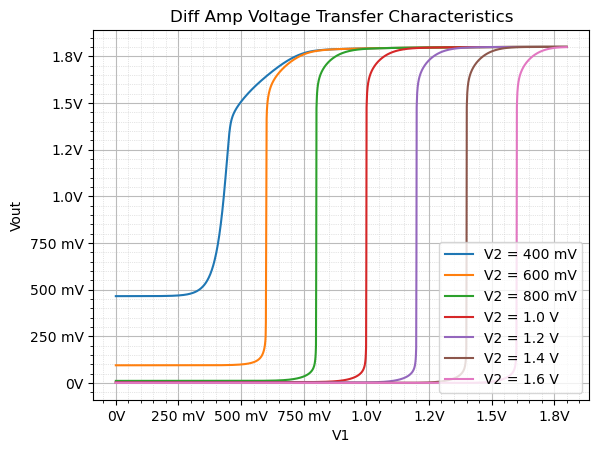

In [45]:
plt.figure()
axes_labels("V1", "V", "Vout", "V", "Diff Amp Voltage Transfer Characteristics")
for v2_val in [0.4,0.6, 0.8, 1.0, 1.2, 1.4, 1.6]:
    this_sweep = df_vtc[df_vtc["V2"] == v2_val]
    plt.plot(np.array(this_sweep["V1"]), np.array(this_sweep["Vout"]), label = f"V2 = {sigfig_format(v2_val, sigfigs = 2)}V")
    gain = max(this_sweep["Vout"].diff()[1:] / this_sweep["V1"].diff()[1:])
    print(f"Gain for V2 = {sigfig_format(v2_val, sigfigs = 2)}V is {int(gain)}")
make_grids()
plt.legend(loc = "lower right")

Incremental transconductance gain is 176 µA/V, which means the early effect resistance is 4.66 MΩ
The maximum current is 20.1 µA, and the minimum current is -17.0 µA


/home/madvlsi/dev/git/vlsi/mp3/simulation_results/plot_labler.py:13: RuntimeWarning: divide by zero encountered in log10
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)
/home/madvlsi/dev/git/vlsi/mp3/simulation_results/plot_labler.py:13: RuntimeWarning: invalid value encountered in scalar remainder
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)


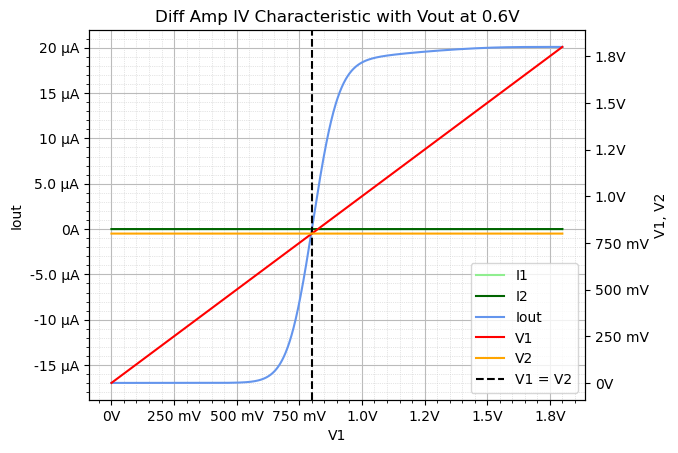

In [46]:
plt.figure()
ax_left = plt.gca()
ax_right = ax_left.twinx()
ax_left.plot(np.array(df_iout["V1"]), np.array(df_iout["I1"]), color = "lightgreen", label = "I1")
ax_left.plot(np.array(df_iout["V1"]), np.array(df_iout["I2"]), color = "darkgreen", label = "I2")
ax_left.plot(np.array(df_iout["V1"]), np.array(df_iout["Iout"]), color = "cornflowerblue", label = "Iout")
ax_right.plot(np.array(df_iout["V1"]), np.array(df_iout["V1"]), color = "red", label = "V1")
ax_right.plot(np.array(df_iout["V1"]), np.array(df_iout["V2"]), color = "orange", label = "V2")
ax_left.plot([], [], color = "red", label = "V1")
ax_left.plot([], [], color = "orange", label = "V2")
ax_left.axvline(x = 0.8, color = "black", linestyle = "dashed", label = "V1 = V2")
make_grids(ax_left)
axes_labels("V1", "V", "V1, V2", "V", ax = ax_right)
axes_labels("V1", "V", "Iout", "A", "Diff Amp IV Characteristic with Vout at 0.6V", ax = ax_left)
ax_left.legend(loc = "lower right")

gain = max(df_iout["Iout"].diff()[1:] / df_iout["V1"].diff()[1:])
max_current = max(df_iout["Iout"])
min_current = min(df_iout["Iout"])
print(f"Incremental transconductance gain is {sigfig_format(gain)}A/V, which means the early effect resistance is {sigfig_format(820 / gain)}Ω")
print(f"The maximum current is {sigfig_format(max_current)}A, and the minimum current is {sigfig_format(min_current)}A")

/home/madvlsi/dev/git/vlsi/mp3/simulation_results/plot_labler.py:13: RuntimeWarning: divide by zero encountered in log10
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)
/home/madvlsi/dev/git/vlsi/mp3/simulation_results/plot_labler.py:13: RuntimeWarning: invalid value encountered in scalar remainder
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)


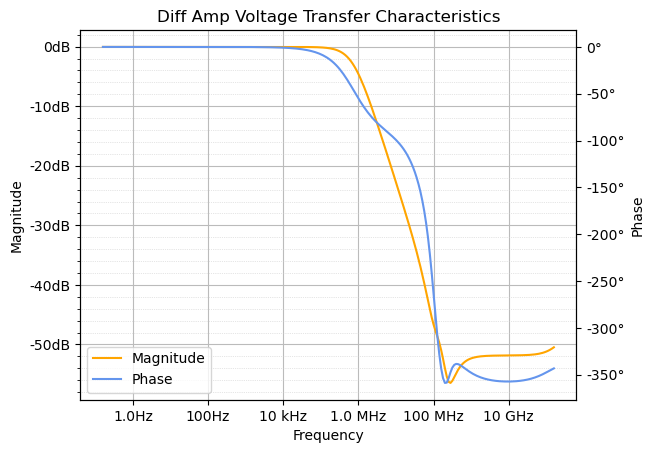

In [47]:
plt.figure()
ax_left = plt.gca()
ax_right = ax_left.twinx()
ax_left.semilogx(np.array(df_ac["freq"]), np.array(df_ac["mag"]), color = "orange", label = "Magnitude")
ax_right.semilogx(np.array(df_ac["freq"]), np.array(df_ac["phase"]), color = "cornflowerblue", label = "Phase")
ax_left.semilogx([], [], color = "cornflowerblue", label = "Phase")
make_grids(ax_left)
axes_labels("", "", "Phase", "°", ax = ax_right)
axes_labels("Frequency", "Hz", "Magnitude", "dB", "Diff Amp Voltage Transfer Characteristics", ax = ax_left)
ax_left.legend(loc = "lower left")

The maximum gain at DC according to the Loopgain analysis is 468


/home/madvlsi/dev/git/vlsi/mp3/simulation_results/plot_labler.py:13: RuntimeWarning: divide by zero encountered in log10
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)
/home/madvlsi/dev/git/vlsi/mp3/simulation_results/plot_labler.py:13: RuntimeWarning: invalid value encountered in scalar remainder
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)


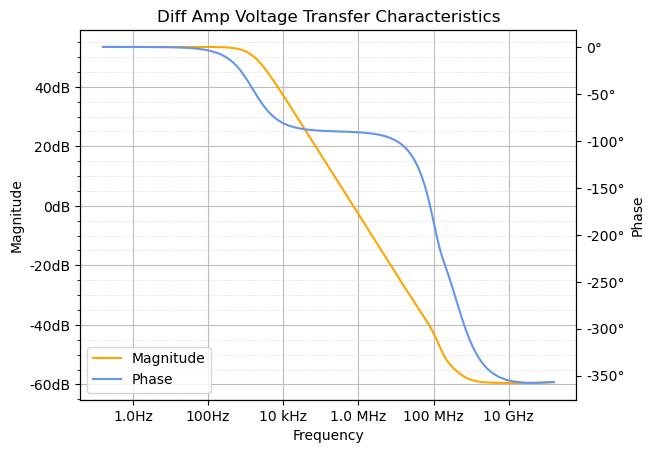

In [48]:
plt.figure()
ax_left = plt.gca()
ax_right = ax_left.twinx()
ax_left.semilogx(np.array(df_loopgain["freq"]), np.array(df_loopgain["mag"]), color = "orange", label = "Magnitude")
ax_right.semilogx(np.array(df_loopgain["freq"]), np.array(df_loopgain["phase"]), color = "cornflowerblue", label = "Phase")
ax_left.semilogx([], [], color = "cornflowerblue", label = "Phase")
make_grids(ax_left)
axes_labels("", "", "Phase", "°", ax = ax_right)
axes_labels("Frequency", "Hz", "Magnitude", "dB", "Diff Amp Voltage Transfer Characteristics", ax = ax_left)
ax_left.legend(loc = "lower left")
max_gain = 10 ** (max(df_loopgain["mag"]) / 20)
print(f"The maximum gain at DC according to the Loopgain analysis is {int(max_gain)}")